In [2]:
#import yfinance as yf 
#import pandas as pd

#from matplotlib import pylab as plt

from zipline.api import order, record, symbol

# Initial Rebalancing Program for monthly rebalancing

USE ZIPLINE


In [5]:
sp500_tmp=yf.download('^GSPC')
gld_tmp=yf.download('GLD')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
sp500=sp500_tmp['Close']
gld = gld_tmp['Close']

data=pd.concat([sp500, gld],join='outer', axis=1)
data.columns=["sp500", "gold"]
data=data.fillna(method='ffill')
data=data.dropna()

In [76]:
weight = [0.5, 0.5]
norm_data =data/data.first('1D').values

In [88]:
port = (weight * norm_data).sum(axis=1)
port_ret = port.pct_change()
port_ret.dropna()
port_ret = (port_ret+1).cumprod()

In [97]:
bench = data["sp500"].pct_change()
bench.dropna()
bench = (bench+1).cumprod()

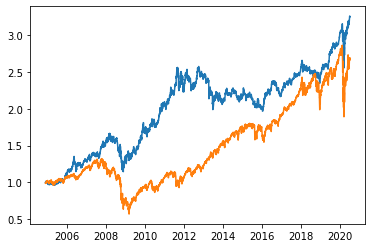

In [98]:
plt.plot(port_ret)
plt.plot(bench)